### Plot Diff-in-Diff for Florida, Texas, and Washington

In [1]:
%load_ext lab_black
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [2]:
# load shipment rate data for FL and its comparison states ((average of PA, AR, NM)
import warnings

warnings.filterwarnings("ignore")

fl_morph_rate = pd.read_csv(
    "./estimating-impact-of-opioids-2020-team2/20_intermediate_files/FL_shipment_and_pop.csv",
    sep=",",
    index_col=0,
)
avg_morph_rate_compare_to_fl = pd.read_csv(
    "./ComparisonStatesMorphPerCap.csv",
    sep=",",
)

In [3]:
fl_morph_rate.head()

,Year,BUYER_STATE,County,MORPHINE_EQUIV_IN_MG,Population,MORPH_POP_RATIO
0,2006,FL,PALM BEACH,5379.0,1284489.0,0.004188
1,2006,FL,PALM BEACH,10758.0,1284489.0,0.008375
2,2007,FL,PALM BEACH,32274.0,1286586.0,0.025085
3,2007,FL,PALM BEACH,32274.0,1286586.0,0.025085
4,2007,FL,PALM BEACH,8068.5,1286586.0,0.006271


In [4]:
avg_morph_rate_compare_to_fl

,Year,MORPHINE_EQUIV_IN_MG,Population,Avg_Morph_MG_PerCap
0,2006,5.960705e+09,1571923255193,0.003792
1,2007,6.896136e+09,1764793931736,0.003908
2,2008,7.744266e+09,1931049629860,0.004010
3,2009,8.684839e+09,2036291024441,0.004265
4,2010,9.519364e+09,2116840033886,0.004497
5,2011,1.049407e+10,2287045926697,0.004588
6,2012,1.086222e+10,2411903621579,0.004504
7,2013,1.024006e+10,2557472251660,0.004004
8,2014,1.028864e+10,2402509323159,0.004282


In [5]:
# subset to dataframes with averaged morph rate by year for FL

fl_avg_morph_rate = fl_morph_rate.groupby(["Year"], as_index=False)[
    "MORPH_POP_RATIO"
].mean()

In [6]:
fl_avg_morph_rate

,Year,MORPH_POP_RATIO
0,2006,0.014046
1,2007,0.015347
2,2008,0.018157
3,2009,0.021899
4,2010,0.026608
5,2011,0.024043
6,2012,0.018413
7,2013,0.015286
8,2014,0.018060


In [7]:
# seperate to pre and post policy periods for FL its comparison states (average of PA, AR, NM)

x_pre_fl = np.array(fl_avg_morph_rate[fl_avg_morph_rate["Year"] < 2010]["Year"])
y_pre_fl = np.array(
    fl_avg_morph_rate[fl_avg_morph_rate["Year"] < 2010]["MORPH_POP_RATIO"]
)
x_post_fl = np.array(fl_avg_morph_rate[fl_avg_morph_rate["Year"] >= 2010]["Year"])
y_post_fl = np.array(
    fl_avg_morph_rate[fl_avg_morph_rate["Year"] >= 2010]["MORPH_POP_RATIO"]
)

x_pre_comp = np.array(
    avg_morph_rate_compare_to_fl[avg_morph_rate_compare_to_fl["Year"] < 2010]["Year"]
)
y_pre_comp = np.array(
    avg_morph_rate_compare_to_fl[avg_morph_rate_compare_to_fl["Year"] < 2010][
        "Avg_Morph_MG_PerCap"
    ]
)
x_post_comp = np.array(
    avg_morph_rate_compare_to_fl[avg_morph_rate_compare_to_fl["Year"] >= 2010]["Year"]
)
y_post_comp = np.array(
    avg_morph_rate_compare_to_fl[avg_morph_rate_compare_to_fl["Year"] >= 2010][
        "Avg_Morph_MG_PerCap"
    ]
)

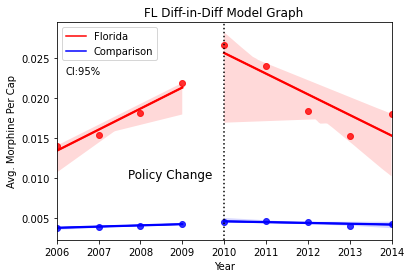

In [8]:
fig, ax = plt.subplots()
# ax.plot(x_pre_fl, y_pre_fl, "o")
m, b = np.polyfit(x_pre_fl, y_pre_fl, 1)
plt.plot(x_pre_fl, m * x_pre_fl + b, color="red")
ax = sns.regplot(x_pre_fl, y_pre_fl, ci=95, color="r")

# ax.plot(x_post_fl, y_post_fl, "o")
m, b = np.polyfit(x_post_fl, y_post_fl, 1)
plt.plot(x_post_fl, m * x_post_fl + b, color="red", label="Florida")
sns.regplot(x_post_fl, y_post_fl, ci=95, color="r")

# ax.plot(x_pre_comp, y_pre_comp, "o")
m, b = np.polyfit(x_pre_comp, y_pre_comp, 1)
plt.plot(x_pre_comp, m * x_pre_comp + b, color="blue")
sns.regplot(x_pre_comp, y_pre_comp, ci=95, color="b")

# ax.plot(x_post_comp, y_post_comp, "o")
m, b = np.polyfit(x_post_comp, y_post_comp, 1)
plt.plot(x_post_comp, m * x_post_comp + b, color="blue", label="Comparison")
sns.regplot(x_post_comp, y_post_comp, ci=95, color="b")

plt.xlabel("Year")
plt.ylabel("Avg. Morphine Per Cap")
plt.title("FL Diff-in-Diff Model Graph")
plt.axvline(x=2010, color="black", ls=":")
plt.text(2007.7, 0.01, "Policy Change", fontsize=12)
plt.text(2006.2, 0.023, "CI:95%", fontsize=10)

plt.legend(loc="upper left")
plt.show()